In [68]:
import warnings
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [76]:
# Load data
xl = pd.ExcelFile('solar_energy.xlsx')

# Read all sheets into a dictionary
data = {sheet_name: xl.parse(sheet_name) for sheet_name in xl.sheet_names}

res = []

for name in xl.sheet_names:
    # Extract the 'estimated_solar_generation' column as a list
    aux = data[name]['Est Total Solar'].tolist()
    res.append(aux)

# Flatten the list of lists
res = list(it.chain(*res))

print('original number of datapts =') #34 datapoints in total by month
print(len(res))

original number of datapts =
34


In [27]:
# Generate x values as enumeration of y values
x_data = np.arange(len(res))
y_data = np.array(res)

# Interpolation using cubic spline
interpolator = interp1d(x_data, y_data, kind='cubic')

x_interp = np.linspace(min(x_data), max(x_data), 68)
res_interpolated = interpolator(x_interp)

print('interpolated points =')
print(len(res_interpolated))

interpolated points =
68


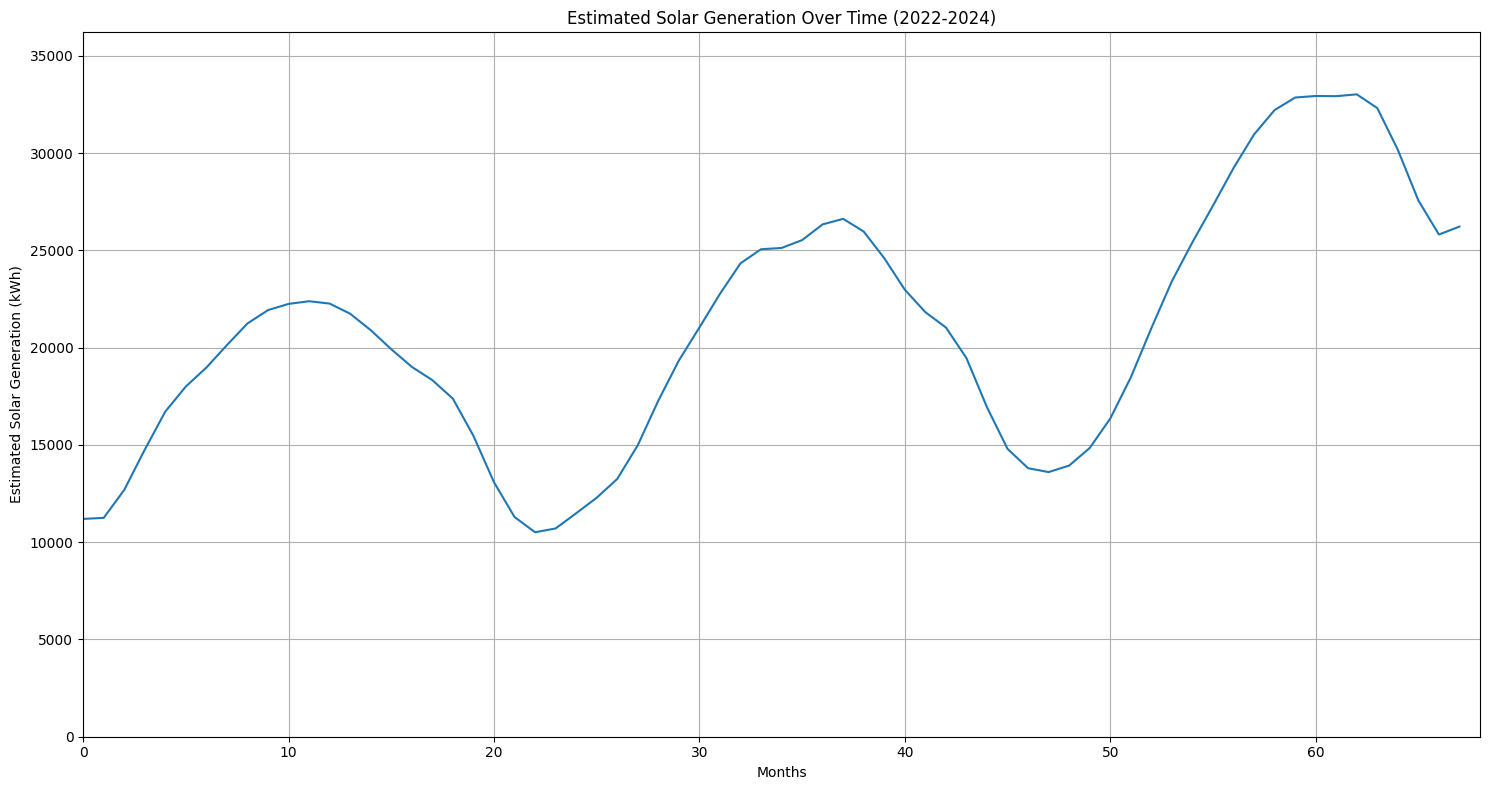

In [28]:
# Plot the interpolated data for verification and maintained seasonality
plt.figure(figsize=(15, 8))
plt.plot(res_interpolated)
plt.axis([0, len(res_interpolated), 0, max(res) * 1.1])
plt.xlabel('Months')
plt.ylabel('Estimated Solar Generation (kWh)')
plt.title('Estimated Solar Generation Over Time (2022-2024)')

plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Define the sinusoidal exponential midline function
def sinusoidal_exponential(x, A, B, C, D, E, F):
    return A * np.sin(B * x + C) + D * np.exp(E * x) + F

# Define the sinusoidal logistic function
def sinusoidal_logistic(x, A, B, C, D, E, F, G):
    return A * np.sin(B * x + C) + D / (1 + np.exp(-E * (x - F))) + G

In [35]:
x = np.arange(68)
y = np.array(res_interpolated)

# Initial guess for the parameters (you can adjust these)
initial_guess = [1, 0.1, 0, 1, 0.01, 0]

# Fit the data
params, params_covariance = curve_fit(sinusoidal_exponential, x, y, p0=initial_guess)

# Extract fitted parameters
A, B, C, D, E, F = params
print(f"Fitted Parameters:\nA={A}, B={B}, C={C}, D={D}, E={E}, F={F}")

# Compute the predicted values
y_pred = sinusoidal_exponential(x, A, B, C, D, E, F)

# Calculate R^2
ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)
print(f"R^2 = {r_squared}")

Fitted Parameters:
A=-6910.826503400053, B=-0.2573750950942719, C=-5.098233424831294, D=1589.6584708182277, E=0.03233577425380726, F=14723.762572397321
R^2 = 0.9802710346948588


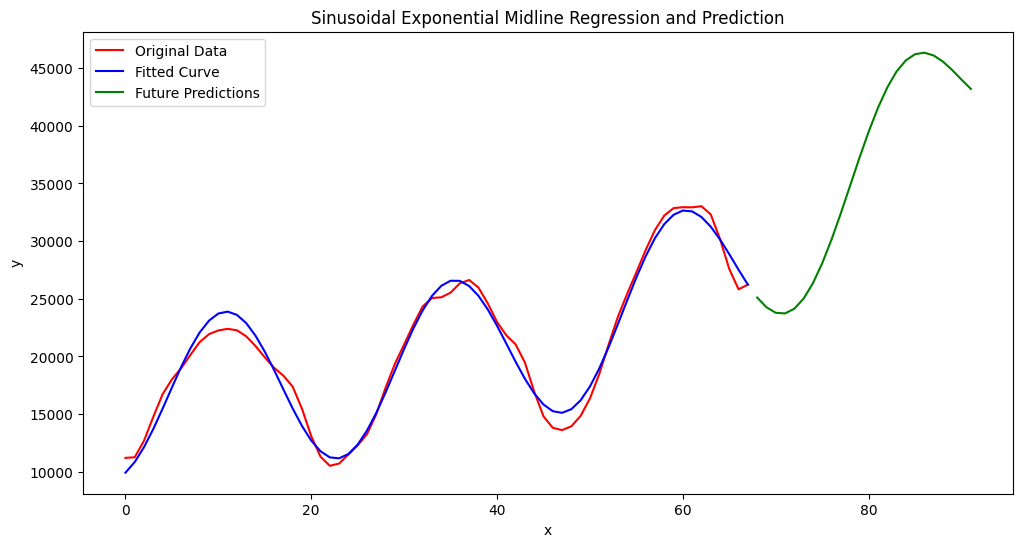

Prediction 1: 25102.7096
Prediction 2: 24260.5301
Prediction 3: 23780.6132
Prediction 4: 23727.1269
Prediction 5: 24137.2172
Prediction 6: 25018.5958
Prediction 7: 26349.0690
Prediction 8: 28078.0364
Prediction 9: 30129.8637
Prediction 10: 32408.9052
Prediction 11: 34805.8456
Prediction 12: 37204.9446
Prediction 13: 39491.7052
Prediction 14: 41560.4622
Prediction 15: 43321.3899
Prediction 16: 44706.4686
Prediction 17: 45674.0151
Prediction 18: 46211.4811
Prediction 19: 46336.3329
Prediction 20: 46094.9564
Prediction 21: 45559.6581
Prediction 22: 44823.9611
Prediction 23: 43996.5047
Prediction 24: 43193.9508


In [36]:
# Generate predictions for the next 24 datapoints
x_future = np.arange(68, 68 + 24)
y_future = sinusoidal_exponential(x_future, *params)

# Plot the original data, fitted curve, and future predictions
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Original Data', color='red', linestyle='-')
plt.plot(x, sinusoidal_exponential(x, *params), label='Fitted Curve', color='blue', linestyle='-')
plt.plot(x_future, y_future, label='Future Predictions', color='green', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sinusoidal Exponential Midline Regression and Prediction')
plt.legend()
plt.show()

# Print future predictions
for i, pred in enumerate(y_future, start=1):
    print(f"Prediction {i}: {pred:.4f}")

In [41]:
# Initial guess for the parameters (adjust based on expected behavior)
initial_guess = [np.ptp(y) / 2, 0.1, 0, max(y), 0.01, 34, np.mean(y)]

# Fit the data
params, params_covariance = curve_fit(sinusoidal_logistic, x, y, p0=initial_guess)

# Extract fitted parameters
A, B, C, D, E, F, G = params
print(f"Fitted Parameters:\nA={A}, B={B}, C={C}, D={D}, E={E}, F={F}, G={G}")

# Compute the predicted values
y_pred = sinusoidal_logistic(x, A, B, C, D, E, F, G)

# Calculate R^2
ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)
print(f"R^2 = {r_squared}")

Fitted Parameters:
A=12540.227671177337, B=0.09086596651162969, C=0.5463811186676003, D=24742.636619516423, E=0.6745603085832002, F=28.945971015705606, G=6940.121703838076
R^2 = 0.7196629618144335


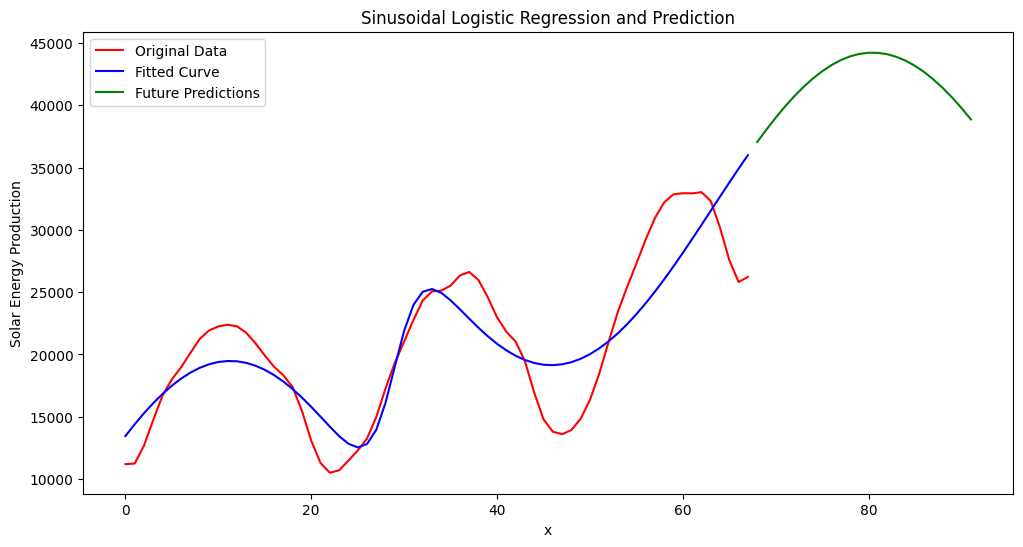

Prediction 1: 37047.7413
Prediction 2: 38054.1253
Prediction 3: 39007.9395
Prediction 4: 39901.3141
Prediction 5: 40726.8778
Prediction 6: 41477.8191
Prediction 7: 42147.9418
Prediction 8: 42731.7168
Prediction 9: 43224.3275
Prediction 10: 43621.7094
Prediction 11: 43920.5836
Prediction 12: 44118.4843
Prediction 13: 44213.7784
Prediction 14: 44205.6798
Prediction 15: 44094.2553
Prediction 16: 43880.4242
Prediction 17: 43565.9508
Prediction 18: 43153.4299
Prediction 19: 42646.2651
Prediction 20: 42048.6410
Prediction 21: 41365.4885
Prediction 22: 40602.4445
Prediction 23: 39765.8046
Prediction 24: 38862.4719


In [42]:
# Generate predictions for the next 24 datapoints
x_future = np.arange(68, 68 + 24)
y_future = sinusoidal_logistic(x_future, *params)

# Plot the original data, fitted curve, and future predictions
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Original Data', color='red', linestyle='-')
plt.plot(x, sinusoidal_logistic(x, *params), label='Fitted Curve', color='blue', linestyle='-')
plt.plot(x_future, y_future, label='Future Predictions', color='green', linestyle='-')
plt.xlabel('x')
plt.ylabel('Solar Energy Production')
plt.title('Sinusoidal Logistic Regression and Prediction')
plt.legend()
plt.show()

# Print future predictions
for i, pred in enumerate(y_future, start=1):
    print(f"Prediction {i}: {pred:.4f}")